In [ ]:
#################################################################################################################
#
#
#
#  Proyecto: Integración de rasters en un geotiff estandarizado
#  Fecha: 10/06/2019
#  Autores: stu-keil urdaibayc
#  Licencia: 
#  Entrada: archivos .kml con referencia a .tiff
#  Salida: archivos geotiff en formato RGBA
#
#
#
#################################################################################################################

In [290]:
import rasterio
from rasterio.merge import merge
import rasterio.plot
import numpy as np
import matplotlib
import rasterio
import os
import pandas as pd
import gdal

%matplotlib inline  

In [291]:
###### Manejo de path y extraer nombres de archivos 
os.getcwd()
infilenames = os.listdir("../data/raw/")
path_data_raw = "../data/raw/"
path_data_processed = "../data/processed/"

In [292]:
#Separar kml de tiffs y nombres de radios
infilenames_kml = [x for x in infilenames if x.find("kml") > 0]
infilenames_tiff =[x for x in infilenames if x.find("tiff") > 0]
radio_names = [x.replace('.kml', '') for x in infilenames_kml]
infilenames_kml.sort()
infilenames_tiff.sort()
radio_names.sort()

In [293]:
for i in range(len(infilenames_tiff)):
    fn = gdal.Open(str(path_data_raw+infilenames_tiff[i]))
    band = fn.GetRasterBand(1)
    ct   = band.GetRasterColorTable()
    f = open(str(path_data_raw+radio_names[i]+"_rgb_color.txt"), 'w+')    
    for i in range(ct.GetCount()):
        sEntry = ct.GetColorEntry(i)
        alpha = 100
        if (sEntry[0]==sEntry[1])&(sEntry[0]==sEntry[2]):
            alpha = 0  
        f.write( "  %3d. %d %d %d %d\n" % (i, sEntry[0],sEntry[1],sEntry[2],alpha))
    f.close()

In [294]:
os.chdir(path_data_raw)
path_data_processed = "../processed/"
for i in range(len(infilenames_kml)):
    os.system(str("gdal_translate -of GTiff " + infilenames_kml[i] + " " +  str(radio_names[i]+"_geo.tif")))
    os.system(str("gdaldem color-relief -of GTiff " + str(radio_names[i]+"_geo.tif") + " "+ str(radio_names[i]+"_rgb_color.txt") +" " +  str(path_data_processed+radio_names[i]+"_geo_color.tif -alpha")))
os.chdir("../../code")
path_data_processed = "../data/processed/"

In [310]:
files = os.listdir(path_data_processed)
fn1 = rasterio.open(str(path_data_processed+files[0]))
fn2 = rasterio.open(str(path_data_processed+files[1]))
fn3 = rasterio.open(str(path_data_processed+files[2]))
fn4 = rasterio.open(str(path_data_processed+files[3]))

In [243]:
rasterio edit-info --nodata 0 Radio_Nationale_du_Tchad-Djamena_geo_color.tif

SyntaxError: invalid syntax (<ipython-input-243-d0abde3ff552>, line 1)

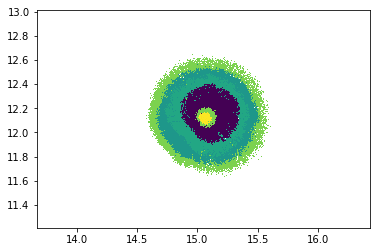

In [275]:
rasterio.plot.show(fn2)


In [320]:
mosaic, out_trans = merge([fn1,fn2,fn3,fn4])

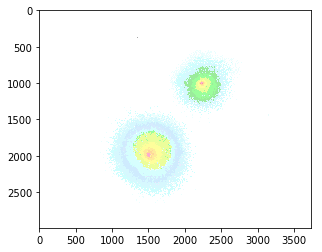

In [321]:
rasterio.plot.show(mosaic)

In [322]:
out_meta = fn1.meta.copy()
out_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 3000,
 'height': 2000,
 'count': 4,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.0009204733333333337, 0.0, 13.67876,
        0.0, -0.0008998900000000001, 12.9957)}

In [323]:
out_meta.update({"height": mosaic.shape[1],"width": mosaic.shape[2],"transform": out_trans})

In [324]:
with rasterio.open(str(path_data_processed+"mosaic1.tif"), "w", **out_meta) as dest:
    dest.write(mosaic)